#Lab10


In the previous lab9, we practised using ktrain for building pretrained models on text classification tasks, via only several lines of code. In this lab, let's try to play with two generative models provided by ktrain, based on the official examples released by [ktrain](https://github.com/amaiya/ktrain).

Let's install ktrain to get started.

# Installing ktrain

We can install ktrain directly using pip.

In [ ]:
!pip install ktrain

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 25.3/25.3 MB 23.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 19.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 468.8/468.8 kB 40.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Created wheel for ktrain: filename=ktrain-0.41.3-py3-none-any.whl size=25316960 sha256=9d25c2ef4f1adad7838f4ceff499f08949838c91ac5af4b5ebeb8f869934857a
  Stored in directory: /root/.cache/pip/wheels/fc/76/11/5b953090eebf531f660948a30cd26e70260619f6480f186a5a
  Created wheel for keras_bert: filename=

# 1.Text Summarization

ktrain includes the ability to summarize text based on a pretrained [BART](https://arxiv.org/abs/1910.13461) model. To perform the summarization, we first need to create a [TransformerSummarizer](https://amaiya.github.io/ktrain/text/summarization/core.html#ktrain.text.summarization.core.TransformerSummarizer) instance as follows.



In [ ]:
from ktrain.text.summarization import TransformerSummarizer
ts = TransformerSummarizer()

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.58k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.63G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/363 [00:00<?, ?B/s]

Next, let's create a long document about planetary probes. The text is taken from a post in the [20newsgroups dataset](http://qwone.com/~jason/20Newsgroups/).

In [ ]:
sample_doc = """Archive-name: space/new_probes
Last-modified: $Date: 93/04/01 14:39:17 $

UPCOMING PLANETARY PROBES - MISSIONS AND SCHEDULES

    Information on upcoming or currently active missions not mentioned below
    would be welcome. Sources: NASA fact sheets, Cassini Mission Design
    team, ISAS/NASDA launch schedules, press kits.


    ASUKA (ASTRO-D) - ISAS (Japan) X-ray astronomy satellite, launched into
    Earth orbit on 2/20/93. Equipped with large-area wide-wavelength (1-20
    Angstrom) X-ray telescope, X-ray CCD cameras, and imaging gas
    scintillation proportional counters.


    CASSINI - Saturn orbiter and Titan atmosphere probe. Cassini is a joint
    NASA/ESA project designed to accomplish an exploration of the Saturnian
    system with its Cassini Saturn Orbiter and Huygens Titan Probe. Cassini
    is scheduled for launch aboard a Titan IV/Centaur in October of 1997.
    After gravity assists of Venus, Earth and Jupiter in a VVEJGA
    trajectory, the spacecraft will arrive at Saturn in June of 2004. Upon
    arrival, the Cassini spacecraft performs several maneuvers to achieve an
    orbit around Saturn. Near the end of this initial orbit, the Huygens
    Probe separates from the Orbiter and descends through the atmosphere of
    Titan. The Orbiter relays the Probe data to Earth for about 3 hours
    while the Probe enters and traverses the cloudy atmosphere to the
    surface. After the completion of the Probe mission, the Orbiter
    continues touring the Saturnian system for three and a half years. Titan
    synchronous orbit trajectories will allow about 35 flybys of Titan and
    targeted flybys of Iapetus, Dione and Enceladus. The objectives of the
    mission are threefold: conduct detailed studies of Saturn's atmosphere,
    rings and magnetosphere; conduct close-up studies of Saturn's
    satellites, and characterize Titan's atmosphere and surface.

    One of the most intriguing aspects of Titan is the possibility that its
    surface may be covered in part with lakes of liquid hydrocarbons that
    result from photochemical processes in its upper atmosphere. These
    hydrocarbons condense to form a global smog layer and eventually rain
    down onto the surface. The Cassini orbiter will use onboard radar to
    peer through Titan's clouds and determine if there is liquid on the
    surface. Experiments aboard both the orbiter and the entry probe will
    investigate the chemical processes that produce this unique atmosphere.

    The Cassini mission is named for Jean Dominique Cassini (1625-1712), the
    first director of the Paris Observatory, who discovered several of
    Saturn's satellites and the major division in its rings. The Titan
    atmospheric entry probe is named for the Dutch physicist Christiaan
    Huygens (1629-1695), who discovered Titan and first described the true
    nature of Saturn's rings.

	 Key Scheduled Dates for the Cassini Mission (VVEJGA Trajectory)
	 -------------------------------------------------------------
	   10/06/97 - Titan IV/Centaur Launch
	   04/21/98 - Venus 1 Gravity Assist
	   06/20/99 - Venus 2 Gravity Assist
	   08/16/99 - Earth Gravity Assist
	   12/30/00 - Jupiter Gravity Assist
	   06/25/04 - Saturn Arrival
	   01/09/05 - Titan Probe Release
	   01/30/05 - Titan Probe Entry
	   06/25/08 - End of Primary Mission
	    (Schedule last updated 7/22/92)


    GALILEO - Jupiter orbiter and atmosphere probe, in transit. Has returned
    the first resolved images of an asteroid, Gaspra, while in transit to
    Jupiter. Efforts to unfurl the stuck High-Gain Antenna (HGA) have
    essentially been abandoned. JPL has developed a backup plan using data
    compression (JPEG-like for images, lossless compression for data from
    the other instruments) which should allow the mission to achieve
    approximately 70% of its original objectives.

	   Galileo Schedule
	   ----------------
	   10/18/89 - Launch from Space Shuttle
	   02/09/90 - Venus Flyby
	   10/**/90 - Venus Data Playback
	   12/08/90 - 1st Earth Flyby
	   05/01/91 - High Gain Antenna Unfurled
	   07/91 - 06/92 - 1st Asteroid Belt Passage
	   10/29/91 - Asteroid Gaspra Flyby
	   12/08/92 - 2nd Earth Flyby
	   05/93 - 11/93 - 2nd Asteroid Belt Passage
	   08/28/93 - Asteroid Ida Flyby
	   07/02/95 - Probe Separation
	   07/09/95 - Orbiter Deflection Maneuver
	   12/95 - 10/97 - Orbital Tour of Jovian Moons
	   12/07/95 - Jupiter/Io Encounter
	   07/18/96 - Ganymede
	   09/28/96 - Ganymede
	   12/12/96 - Callisto
	   01/23/97 - Europa
	   02/28/97 - Ganymede
	   04/22/97 - Europa
	   05/31/97 - Europa
	   10/05/97 - Jupiter Magnetotail Exploration


    HITEN - Japanese (ISAS) lunar probe launched 1/24/90. Has made
    multiple lunar flybys. Released Hagoromo, a smaller satellite,
    into lunar orbit. This mission made Japan the third nation to
    orbit a satellite around the Moon.


    MAGELLAN - Venus radar mapping mission. Has mapped almost the entire
    surface at high resolution. Currently (4/93) collecting a global gravity
    map.


    MARS OBSERVER - Mars orbiter including 1.5 m/pixel resolution camera.
    Launched 9/25/92 on a Titan III/TOS booster. MO is currently (4/93) in
    transit to Mars, arriving on 8/24/93. Operations will start 11/93 for
    one martian year (687 days).


    TOPEX/Poseidon - Joint US/French Earth observing satellite, launched
    8/10/92 on an Ariane 4 booster. The primary objective of the
    TOPEX/POSEIDON project is to make precise and accurate global
    observations of the sea level for several years, substantially
    increasing understanding of global ocean dynamics. The satellite also
    will increase understanding of how heat is transported in the ocean.


    ULYSSES- European Space Agency probe to study the Sun from an orbit over
    its poles. Launched in late 1990, it carries particles-and-fields
    experiments (such as magnetometer, ion and electron collectors for
    various energy ranges, plasma wave radio receivers, etc.) but no camera.

    Since no human-built rocket is hefty enough to send Ulysses far out of
    the ecliptic plane, it went to Jupiter instead, and stole energy from
    that planet by sliding over Jupiter's north pole in a gravity-assist
    manuver in February 1992. This bent its path into a solar orbit tilted
    about 85 degrees to the ecliptic. It will pass over the Sun's south pole
    in the summer of 1993. Its aphelion is 5.2 AU, and, surprisingly, its
    perihelion is about 1.5 AU-- that's right, a solar-studies spacecraft
    that's always further from the Sun than the Earth is!

    While in Jupiter's neigborhood, Ulysses studied the magnetic and
    radiation environment. For a short summary of these results, see
    *Science*, V. 257, p. 1487-1489 (11 September 1992). For gory technical
    detail, see the many articles in the same issue.


    OTHER SPACE SCIENCE MISSIONS (note: this is based on a posting by Ron
    Baalke in 11/89, with ISAS/NASDA information contributed by Yoshiro
    Yamada (yamada@yscvax.ysc.go.jp). I'm attempting to track changes based
    on updated shuttle manifests; corrections and updates are welcome.

    1993 Missions
	o ALEXIS [spring, Pegasus]
	    ALEXIS (Array of Low-Energy X-ray Imaging Sensors) is to perform
	    a wide-field sky survey in the "soft" (low-energy) X-ray
	    spectrum. It will scan the entire sky every six months to search
	    for variations in soft-X-ray emission from sources such as white
	    dwarfs, cataclysmic variable stars and flare stars. It will also
	    search nearby space for such exotic objects as isolated neutron
	    stars and gamma-ray bursters. ALEXIS is a project of Los Alamos
	    National Laboratory and is primarily a technology development
	    mission that uses astrophysical sources to demonstrate the
	    technology. Contact project investigator Jeffrey J Bloch
	    (jjb@beta.lanl.gov) for more information.

	o Wind [Aug, Delta II rocket]
	    Satellite to measure solar wind input to magnetosphere.

	o Space Radar Lab [Sep, STS-60 SRL-01]
	    Gather radar images of Earth's surface.

	o Total Ozone Mapping Spectrometer [Dec, Pegasus rocket]
	    Study of Stratospheric ozone.

	o SFU (Space Flyer Unit) [ISAS]
	    Conducting space experiments and observations and this can be
	    recovered after it conducts the various scientific and
	    engineering experiments. SFU is to be launched by ISAS and
	    retrieved by the U.S. Space Shuttle on STS-68 in 1994.

    1994
	o Polar Auroral Plasma Physics [May, Delta II rocket]
	    June, measure solar wind and ions and gases surrounding the
	    Earth.

	o IML-2 (STS) [NASDA, Jul 1994 IML-02]
	    International Microgravity Laboratory.

	o ADEOS [NASDA]
	    Advanced Earth Observing Satellite.

	o MUSES-B (Mu Space Engineering Satellite-B) [ISAS]
	    Conducting research on the precise mechanism of space structure
	    and in-space astronomical observations of electromagnetic waves.

    1995
	LUNAR-A [ISAS]
	    Elucidating the crust structure and thermal construction of the
	    moon's interior.


    Proposed Missions:
	o Advanced X-ray Astronomy Facility (AXAF)
	    Possible launch from shuttle in 1995, AXAF is a space
	    observatory with a high resolution telescope. It would orbit for
	    15 years and study the mysteries and fate of the universe.

	o Earth Observing System (EOS)
	    Possible launch in 1997, 1 of 6 US orbiting space platforms to
	    provide long-term data (15 years) of Earth systems science
	    including planetary evolution.

	o Mercury Observer
	    Possible 1997 launch.

	o Lunar Observer
	    Possible 1997 launch, would be sent into a long-term lunar
	    orbit. The Observer, from 60 miles above the moon's poles, would
	    survey characteristics to provide a global context for the
	    results from the Apollo program.

	o Space Infrared Telescope Facility
	    Possible launch by shuttle in 1999, this is the 4th element of
	    the Great Observatories program. A free-flying observatory with
	    a lifetime of 5 to 10 years, it would observe new comets and
	    other primitive bodies in the outer solar system, study cosmic
	    birth formation of galaxies, stars and planets and distant
	    infrared-emitting galaxies

	o Mars Rover Sample Return (MRSR)
	    Robotics rover would return samples of Mars' atmosphere and
	    surface to Earch for analysis. Possible launch dates: 1996 for
	    imaging orbiter, 2001 for rover.

	o Fire and Ice
	    Possible launch in 2001, will use a gravity assist flyby of
	    Earth in 2003, and use a final gravity assist from Jupiter in
	    2005, where the probe will split into its Fire and Ice
	    components: The Fire probe will journey into the Sun, taking
	    measurements of our star's upper atmosphere until it is
	    vaporized by the intense heat. The Ice probe will head out
	    towards Pluto, reaching the tiny world for study by 2016."""

Now, let's use our TransformerSummarizer instance to summarize the long document.

In [ ]:
ts.summarize(sample_doc)

'Information on upcoming or currently active missions not mentioned below would be welcome. Cassini is a joint NASA/ESA project designed to accomplish an exploration of the Saturnian system. JPL has developed a backup plan for the first resolved images of an asteroid, Gaspra, while in transit to Jupiter.'

However, Transformer-based summarization can be slow on a CPU. What if we do not have GPU available and still Want faster summarization?

-> ktrain also supports extractive summarization via [LexRankSummarizer](https://amaiya.github.io/ktrain/text/summarization/core.html#ktrain.text.summarization.core.LexRankSummarizer) based on LexRank using the excellent [sumy](https://pypi.org/project/sumy/) package.

In [ ]:
# Since the LexRankSummarizer uses the summy package, thus, we need to install it first
!pip install sumy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 97.3/97.3 kB 3.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.2/6.2 MB 83.4 MB/s eta 0:00:00
  Created wheel for breadability: filename=breadability-0.1.20-py2.py3-none-any.whl size=21693 sha256=3b3fa6fd6c01b0e87ada22c1c9eec086b1fbdbdd264270d499c6e602e3620b02
  Stored in directory: /root/.cache/pip/wheels/64/22/90/b84fcc30e16598db20a0d41340616dbf9b1e82bbcc627b0b33
  Created wheel for docopt: filename=docopt-0.6.2-py2.py3-none-any.whl size=13706 sha256=fd68a5d019e314c5922d4215b6b1d4a45751e8d3ee3b39332926a7d18a07f61e
  Stored in directory: /root/.cache/pip/wheels/fc/ab/d4/5da2067ac95b36618c629a5f93f809425700506f72c9732fac
Successfully built breadability docopt


In [ ]:
# Besides, LexRankSummarizer also utilizes NLTK tokenizer
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

The list of arguments for the `.summarize()`:
  -  `doc(str)`: text of document
  -  `num_sentences(int)`: Number of sentences for summary. default = 3.
  -  `maximum_length(int)`: Maximum length of sentence in summary. default = 2000.
  -  `minimumlength(int)`: Minimum length of sentence in summary. default = 40.
  -  `join_sentences(bool)`: If True, summary is a single string instead of a list of sentences. default = True.
  -  `num_candidate_sentences(int)`: Number of candidate sentences from which to select final summary. default = 100.

In [ ]:
from ktrain.text.summarization import LexRankSummarizer
lr_summarizer = LexRankSummarizer()
lr_summarizer.summarize(doc=sample_doc, num_sentences=5)

'Archive-name: space/new_probes Last-modified: $Date: 93/04/01 14:39:17 $. Information on upcoming or currently active missions not mentioned below would be welcome. Sources: NASA fact sheets, Cassini Mission Design team, ISAS/NASDA launch schedules, press kits. ASUKA (ASTRO-D) - ISAS (Japan) X-ray astronomy satellite, launched into Earth orbit on 2/20/93. Equipped with large-area wide-wavelength (1-20 Angstrom) X-ray telescope, X-ray CCD cameras, and imaging gas scintillation proportional counters.'

# 2.Language Translation

ktrain also supports language translation. There are currently two different classes to support language translation. 1) [EnglishTranslator](https://amaiya.github.io/ktrain/text/translation/core.html#ktrain.text.translation.core.EnglishTranslator) for translation to English and 2) [Translator](https://amaiya.github.io/ktrain/text/translation/core.html#ktrain.text.translation.core.Translator) for translations between many different languages. Both are wrappers around MarianMT models in the transformers library.

## 2.1 EnglishTranslator


The [EnglishTranslator](https://amaiya.github.io/ktrain/text/translation/core.html#ktrain.text.translation.core.EnglishTranslator) class can be used to easily convert text in various languages to English. It currently supports the following languages:

*   `zh` : Chinese (both Simplified and Traditional)
*   `ar` : Arabic
*   `ru` : Russian
*   `de` : German
*   `af` : Afrikaans
*   `fr` : French
*   `es` : Spanish
*   `it` : Italian
*   `pt` : Portuguese

Let's first import the EnglishTranlator.

In [ ]:
import ktrain
from ktrain.text.translation import EnglishTranslator

Let's try to translate the following sentence to English from a number of different source languages.



*   *`The pandemic has wreaked havoc on world economies. However, as of June 2020, the U.S. stock market continues to rise.`*




To generate translations to English from a particuar language, we simply supply the language code for the language as the `src_lang` argument to `EnglishTranslator`. The following example shows the translation from **Chinese** (`src_lang = zh`) to Englisth.

Note: When instantiating the `EnglishTranslator`, pretrained models are automatically loaded, which may take a few seconds. Once instantiated, the translate method can be repeatedly invoked on different documents or sentences.

In [ ]:
# Chinese to English
translator = EnglishTranslator(src_lang='zh')
src_text = '''大流行对世界经济造成了严重破坏。但是，截至2020年6月，美国股票市场持续上涨。'''
print(translator.translate(src_text))

tokenizer_config.json:   0%|          | 0.00/44.0 [00:00<?, ?B/s]

source.spm:   0%|          | 0.00/805k [00:00<?, ?B/s]

target.spm:   0%|          | 0.00/807k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.62M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.39k [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/models/marian/tokenization_marian.py:175: UserWarning: Recommended: pip install sacremoses.
  warnings.warn("Recommended: pip install sacremoses.")


pytorch_model.bin:   0%|          | 0.00/312M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/293 [00:00<?, ?B/s]

The pandemic has caused serious damage to the world economy.
However, the United States stock market continued to rise as of June 2020.


Next, let us reinstantiate an EnglishTranslator object to translate **Arabic**.

In [ ]:
translator = EnglishTranslator(src_lang='ar')
src_text = '''لقد أحدث الوباء دمارا في اقتصادات العالم.
ومع ذلك ، اعتبارًا من يونيو 2020 ، استمرت سوق الأسهم الأمريكية في الارتفاع.
'''
print(translator.translate(src_text))

tokenizer_config.json:   0%|          | 0.00/42.0 [00:00<?, ?B/s]

source.spm:   0%|          | 0.00/917k [00:00<?, ?B/s]

target.spm:   0%|          | 0.00/802k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/2.13M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.38k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/308M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/293 [00:00<?, ?B/s]

The epidemic has caused devastation in the world's economies.
However, as of June 2020, the American stock market continued to rise.


Now, try **Ruassian** to English.

In [ ]:
translator = EnglishTranslator(src_lang='ru')
src_text = '''Пандемия нанесла ущерб мировой экономике.
Однако по состоянию на июнь 2020 года фондовый рынок США продолжает расти.
'''
print(translator.translate(src_text))

tokenizer_config.json:   0%|          | 0.00/42.0 [00:00<?, ?B/s]

source.spm:   0%|          | 0.00/1.08M [00:00<?, ?B/s]

target.spm:   0%|          | 0.00/803k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/2.60M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.38k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/307M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/293 [00:00<?, ?B/s]

The pandemic has damaged the world economy.
However, as of June 2020, the US stock market continues to grow.


**German** to English.

In [ ]:
translator = EnglishTranslator(src_lang='de')
src_text = '''Die Pandemie hat die Weltwirtschaft verwüstet.
Ab Juni 2020 steigt der US-Aktienmarkt jedoch weiter an.'''
print(translator.translate(src_text))

tokenizer_config.json:   0%|          | 0.00/42.0 [00:00<?, ?B/s]

source.spm:   0%|          | 0.00/797k [00:00<?, ?B/s]

target.spm:   0%|          | 0.00/768k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.27M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.38k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/298M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/293 [00:00<?, ?B/s]

The pandemic has devastated the global economy.
However, the US stock market will continue to rise as of June 2020.


**French** to English.

In [ ]:
translator = EnglishTranslator(src_lang='fr')
src_text = '''La pandémie a fait des ravages dans les économies mondiales.
Cependant, en juin 2020, le marché boursier américain continue de grimper.'''
print(translator.translate(src_text))

tokenizer_config.json:   0%|          | 0.00/265 [00:00<?, ?B/s]

source.spm:   0%|          | 0.00/800k [00:00<?, ?B/s]

target.spm:   0%|          | 0.00/779k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.46M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.37k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/312M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/293 [00:00<?, ?B/s]

The pandemic has devastated the world's economies.
However, in June 2020, the US stock market continues to climb.


**Spanish** to English.

In [ ]:
translator = EnglishTranslator(src_lang='es')
src_text = '''La pandemia ha causado estragos en las economías mundiales.
Sin embargo, a partir de junio de 2020, el mercado de valores de EE. UU. Continúa aumentando.'''
print(translator.translate(src_text))

The pandemic has wreaked havoc on world economies.
However, from June 2020 onwards, the US securities market.
USA.
It keeps on growing.


Note: in the examples above that we supplied a document of two sentences as input. The `translate()` method can accept single sentences, paragraphs, or entire documents. However, if the document is large (e.g., a book), we recommend to break it up into smaller chunks (e.g., pages or paragraphs). This is because ktrain tokenizes the document into individual sentences, which are joined together and fed to model as single batch when generating the translation. If the batch is too large for memory, errors will occur.

## 2.2 Translator

Let's first import the Tranlator.

In [ ]:
import ktrain
from ktrain.text.translation import Translator
import locale
locale.getpreferredencoding = lambda: "UTF-8"

In [ ]:
!pip install sacremoses

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 897.5/897.5 kB 14.6 MB/s eta 0:00:00


The [Translator](https://amaiya.github.io/ktrain/text/translation/core.html#ktrain.text.translation.core.Translator) class can translate **from** and **to** other languages. The Translator instances accept as input a pretrained model from [Helsinki-NLP](https://huggingface.co/models?search=Helsinki-NLP%2Fopus-mt) (implemented by the Natural Language Processing and Language Technology research at University of Helsinki). For instance, to translate **Chinese** to **German**, one can use the [Helsinki-NLP/opus-mt-zh-de](https://huggingface.co/Helsinki-NLP/opus-mt-zh-de) model.

In [ ]:
translator = Translator(model_name='Helsinki-NLP/opus-mt-zh-de')
src_text = '''冠状病毒大流行对世界经济造成了严重破坏。但是，截至2020年6月，美国股市继续上涨。'''
print(translator.translate(src_text))

tokenizer_config.json:   0%|          | 0.00/44.0 [00:00<?, ?B/s]

source.spm:   0%|          | 0.00/749k [00:00<?, ?B/s]

target.spm:   0%|          | 0.00/823k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.54M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.39k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/312M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/293 [00:00<?, ?B/s]

Der Virus ist in der Weltwirtschaft sehr beschädigt.
Aber im Juni 2020 stiegen die Aktienmarkte weiter.


# Lab 10 Exercise
Please complete the following **question E1** for Lab 10 and check with your Lab Facilitator in the lab.

**Submission Due**: Your Lab 11 (in Week 12)

**Submission Method**: Show your final code to your tutor during the Lab.

## E1. Help me translate!


In this exercise, you are asked to build an translation interface, utilizing the ktrain **Translator** (introduced in the section 2.2 above). The interface is provided below. It allows users to input the `English_Query` and the `Target_Language`. You need to implemente the Translator, which will take the english query as input, and translate it to the target language. After users input the query and target language, and run the cell, the translation will be shown in the output.


**Note** that it should allow the translation for ALL three target languages, including Chinese, Spanish, and Arabic.

Hint: You can easily find the models that can do the traslations from the [Helsinki-NLP](https://huggingface.co/models?search=Helsinki-NLP%2Fopus-mt).

In [ ]:
#@title Translation Helper!
#@markdown Hello, I can speak 4 languages, including English, Chinese, Spanish, and Arabic. I can translate anything you ask in English (i.e., Source_Language) to any of the other three languages (i.e., Target_Language). Try me!

#Variable for storing the user query (in English)
English_Query = 'This is an example input sentence'  #@param {type: "string"}

#Variable for storing the target language (either Chinese, Spanish, or Arabic)
Target_Language = ''  #@param {type: "string"}



# Your implementation to translate the query from English to the target language:





#@markdown ---> After you input your query, just run this cell to see my translation!


### Sample Ouput

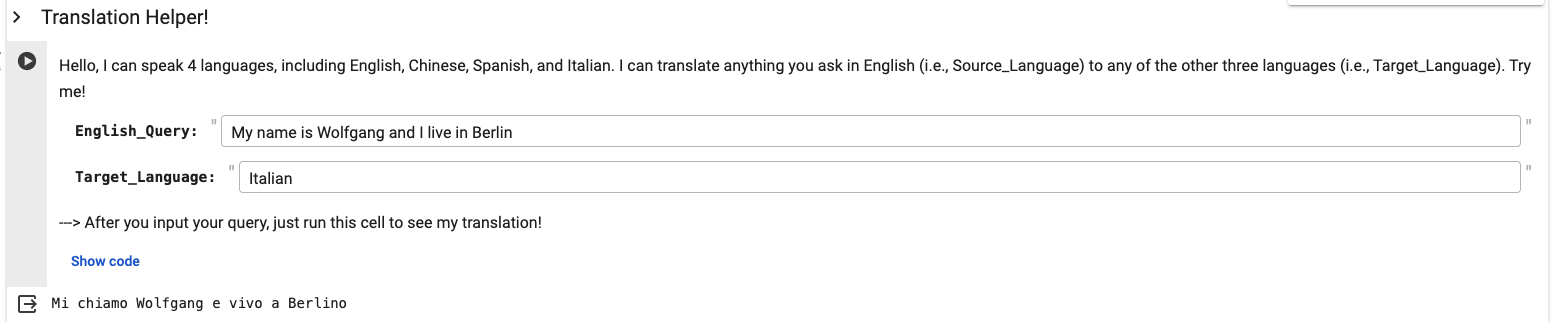

# E1. Sample Solution

In [ ]:
#@title Translation Helper!
#@markdown Hello, I can speak 4 languages, including English, Chinese, Spanish, and Italian. I can translate anything you ask in English (i.e., Source_Language) to any of the other three languages (i.e., Target_Language). Try me!

#Variable for storing the user query (in English)
English_Query = 'My name is Wolfgang and I live in Berlin'  #@param {type: "string"}

#Variable for storing the target language (either Chinese, Spanish, or Italian)
Target_Language = 'spanish'  #@param {type: "string"}



# Your implementation to translate the query from English to the target language:
target_langs_model = {
    'chinese': 'Helsinki-NLP/opus-mt-en-zh',
    'spanish': 'Helsinki-NLP/opus-mt-en-es',
    'italian': 'Helsinki-NLP/opus-mt-en-it'
}

import ktrain
from ktrain.text.translation import Translator

if English_Query == '':
  print("Sorry, the query cannot be empty. Please try again.")
elif Target_Language.lower() not in target_langs_model:
  print("Sorry, I can only translate English to Chinese, Spanish or Italian, but not other languages. Please try again.")
else:
  translator = Translator(model_name = target_langs_model[Target_Language.lower()])
  print(translator.translate(English_Query))



#@markdown ---> After you input your query, just run this cell to see my translation!


Mi nombre es Wolfgang y vivo en Berlín.
